In [93]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd

In [5]:
data=pd.read_csv("D:\Fish.csv")
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Species']=le.fit_transform(data['Species'])
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,5,12.2,11.5,12.2,13.4,2.0904,1.3936
155,5,13.4,11.7,12.4,13.5,2.4300,1.2690
156,5,12.2,12.1,13.0,13.8,2.2770,1.2558
157,5,19.7,13.2,14.3,15.2,2.8728,2.0672


In [33]:
x=data[['Species','Length1','Length2','Length3','Height','Width']]
y=data['Weight']

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
poly=PolynomialFeatures(degree=2)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.transform(x_test)

In [74]:
model=LinearRegression()
model.fit(x_train_poly,y_train)
y_pred=model.predict(x_test_poly)
print(r2_score(y_pred,y_test))

0.9167516458964906


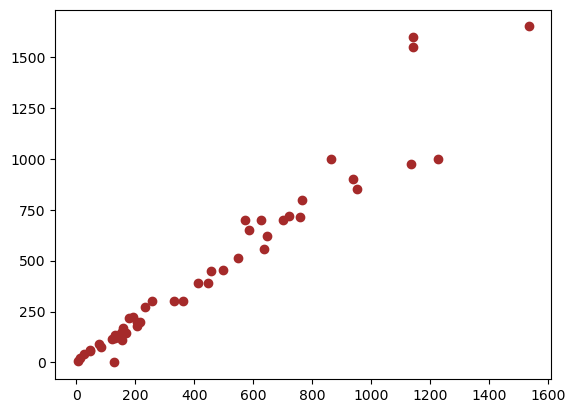

In [89]:
plt.scatter(y_pred,y_test,color='brown')


In [85]:
#LASSO regularization
from sklearn.linear_model import Lasso
Alpha=1
lasso=Lasso(alpha=Alpha)
lasso.fit(x_train_poly,y_train)
lasso_pred = lasso.predict(x_test_poly)
print(r2_score(lasso_pred,y_test))

0.9324007250342315


C:\Users\ML Lab\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.353e+04, tolerance: 1.168e+03
  model = cd_fast.enet_coordinate_descent(


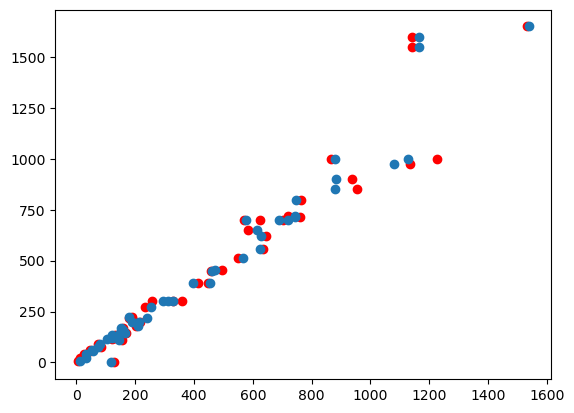

In [91]:
plt.scatter(y_pred,y_test,color='red')
plt.scatter(lasso_pred,y_test)

In [96]:
print(mean_squared_error(y_pred,y_test))
print(mean_absolute_error(lasso_pred,y_test))

11902.194605065919
47.9745933508835


In [100]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train_poly=scale.fit_transform(x_train_poly)
x_test_poly=scale.transform(x_test_poly)
poly=LinearRegression()
poly.fit(x_train_poly,y_train)
y_predict=poly.predict(x_test_poly)
print(mean_squared_error(y_predict,y_test))
print(r2_score(y_predict,y_test))

13235.607412812527
0.9056533750758413
